In [1]:
# Imports 
import os
import pdb
import numpy as np
import openmdao.api as om
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
os.environ["pyna_language"] = 'python'
from pyNA.pyna import pyna

from IPython.display import clear_output
from IPython.core.display import display, HTML
display(HTML("<style>.container { width:100% !important; }</style>"))

In [2]:
# Load nasa stca standard trajectory
traj_nasa_std = pd.read_csv('../cases/nasa_stca_standard/trajectory/Trajectory_to.csv')

# Initialize pyna
py = pyna()

# Set config
py.verification = True
py.all_sources=True
py.shielding=True
py.atmosphere_type = 'stratified'
py.core_jet_suppression = True
py.lateral_attenuation = False
py.levels_int_metric = 'epnl'
py.thrust_lapse = True
py.pkrot = False
py.k_rot = 1.27
py.max_iter = 50
py.TS_to = 0.88
py.TS_vnrs = 0.88
py.TS_cb = 0.61
py.z_cb = traj_nasa_std['Z [m]'][np.where(traj_nasa_std['TS [-]'] < 0.65)[0][0]]
py.z_max = traj_nasa_std['Z [m]'].values[-1]
py.v_max = traj_nasa_std['V [m/s]'].values[-1]
py.tolerance = 1e-3

In [3]:
# Compute noise
py.compute_noise_timeseries()

/Users/laurensvoet/Library/Python/3.7/lib/python/site-packages/openmdao/recorders/sqlite_recorder.py:224: UserWarning:The existing case recorder file, /Users/laurensvoet/Documents/Research/pyNA/pyNA/cases/nasa_stca_standard/dymos_solution.db, is being overwritten.


Model viewer data has already has already been recorded for Driver.


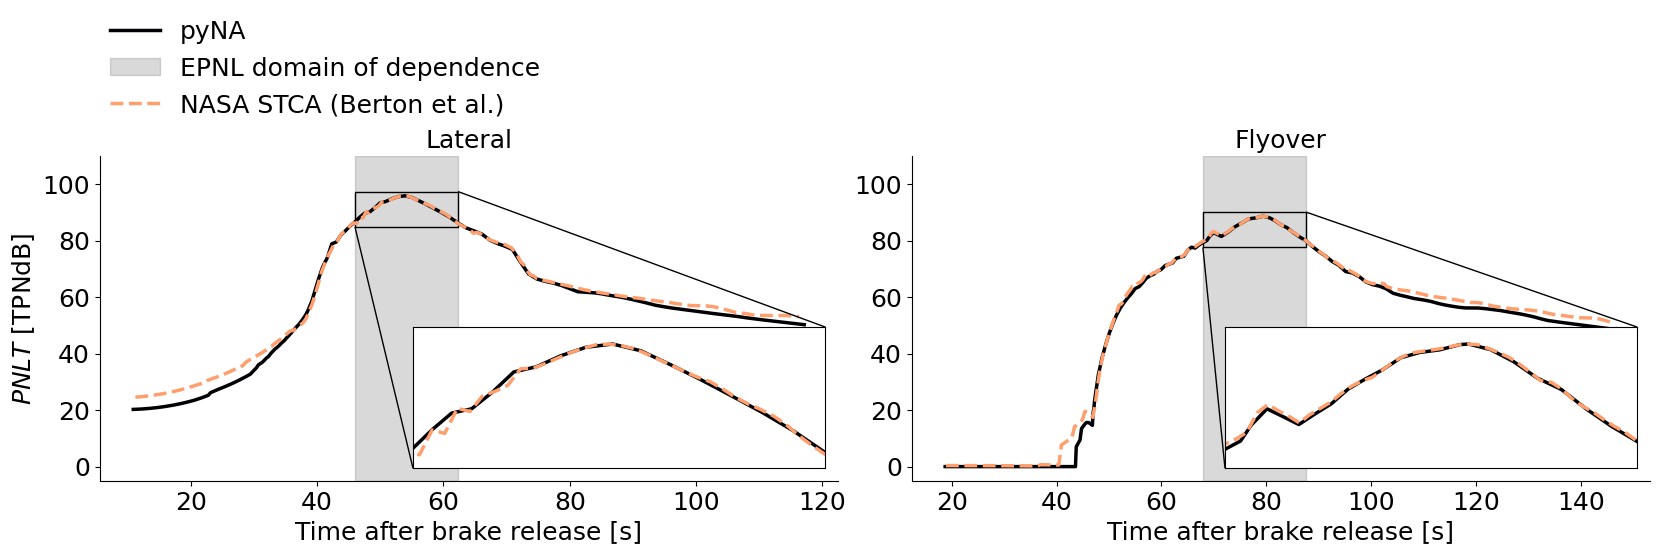

In [5]:
py.plot_noise_timeseries(py.noise_timeseries, metric='pnlt')